# Regression(회귀)

## y = ax + b
## y = theta0 + theta1*x
## 임의의 값 넣어보기 theta0 = 1, theta = 2



In [1]:
class Y_pred():
    def __init__(self, theta_0, theta_1):
        self.theta_0 = theta_0
        self.theta_1 = theta_1

    
def out_y_hat(self, input_x):
    y_hat_row = []
    for i in range(len(input_x)):
        y_hat = self.theta_0 + self.theta_1*input_x[i]
        y_hat_row.append(y_hat)
    
    return y_hat_row

Y_pred.y_hat = out_y_hat

In [2]:
Y_pred_C = Y_pred(theta_0= 1 , theta_1= 2)

In [3]:
x = [1000]
Y_pred_C.y_hat(input_x = x)

[2001]

In [4]:
x = [580, 700, 810, 840]
Y_pred_C = Y_pred(theta_0= 1 , theta_1= 2)
Y_pred_C.y_hat(input_x = x)

[1161, 1401, 1621, 1681]

### Optimization Problem (최적화 문제)
### 목적함수

- 손실함수는 MSE 외에도 다양하게 존재합니다.
- 목적함수 또한 Sum of Square Error(SSE) 외에도 다양하게 존재합니다.
- 결국 손실함수와 목적함수는 서로 비슷한 의미를 내포하고 있습니다.
- 목적함수는 어떤 값을 낮추거나 높이는 목적을 가지는 함수이다

In [5]:
import numpy as np

y_label_total = [374, 385, 375, 401] # 실제값
y_hat_total = [1161, 1401, 1621, 1681] # 임의의 수로 예측한 결과

diff_row = []

for i in range(len(y_hat_total)):
    diff = y_label_total[i] - y_hat_total[i]
    diff_row.append(diff)
    square = np.square(diff_row)
    sse = 1/2 * (np.sum(square))

print("diff = {} \nsquare = {} \nSSE = {}".format(diff, square, sse))

diff = -1280 
square = [ 619369 1032256 1552516 1638400] 
SSE = 2421270.5


## 경사하강법
-  := 는 정의하다라는 기호로 계산한 값으로 갱신한다
-  에타는 Learning Rate로 학습률이다

### 학습률 : 1
### 에폭 : 3
### x : 3

In [6]:
def g(x, eta):
    print("현재 x값 : ", x)
    epoch_1_x = x - eta*((2*x)-2)
    print("첫 번째 에폭 x 값 : {}".format(epoch_1_x))

    epoch_2_x = epoch_1_x - eta*((2*epoch_1_x)-2)
    print("두 번째 에폭 x 값 : {}".format(epoch_2_x))

    epoch_3_x = epoch_2_x - eta*((2*epoch_2_x)-2)
    print("세 번째 에폭 x 값 : {}".format(epoch_3_x))

result = g(x = 3, eta = 1)

현재 x값 :  3
첫 번째 에폭 x 값 : -1
두 번째 에폭 x 값 : 3
세 번째 에폭 x 값 : -1


### 학습률 : 0.01
### 반복갱신횟수 : 10
### x : 3

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def g(learning_rate, epoch_count, random_value_bool = False, x = 3):
    if random_value_bool:
        x = np.random.normal(0, 1, 1)

    print("Now 'x' Value : ", x)
    print("Now Learning Rate Value : ", learning_rate)

    x_row = []

    for i in range(epoch_count):
        x = x - learning_rate*((2*x)-2)
        print("Epoch {} - x {}".format(i+1, round(x,3)))
        x_row.append(x)

    return x_row

In [8]:
result = g(learning_rate=0.1, epoch_count=10, random_value_bool=False, x=3)

Now 'x' Value :  3
Now Learning Rate Value :  0.1
Epoch 1 - x 2.6
Epoch 2 - x 2.28
Epoch 3 - x 2.024
Epoch 4 - x 1.819
Epoch 5 - x 1.655
Epoch 6 - x 1.524
Epoch 7 - x 1.419
Epoch 8 - x 1.336
Epoch 9 - x 1.268
Epoch 10 - x 1.215


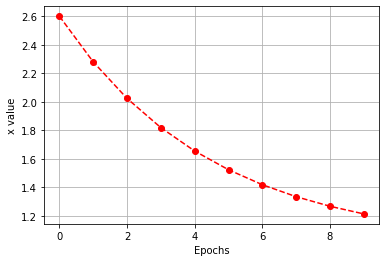

In [9]:
plt.plot(result, '--o', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('x value')
plt.grid()
plt.show()

## 2021.07.06

In [27]:
import numpy as np

In [28]:
x = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

In [29]:
input_cnt = 1
output_cnt = 1
RND_MEAN = 0
RND_STD = 1

In [30]:
def main_execute(x, y, epoch_count, report, lr = 0.001):
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x, y, epoch_count, report, lr)

    return sse_row, theta_0_row, theta_1_row

# theta 초기화
def model_init():
    global theta_0, theta_1
    theta_1 = np.random.normal(RND_MEAN,RND_STD,[input_cnt, output_cnt])
    theta_0 = np.random.normal(RND_MEAN,RND_STD,[output_cnt])

In [31]:
# y_hat 구하는 함수
def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x 
    return y_hat

In [32]:
# 손실함수 SSE를 사용해서 후처리 하는 함수
def forward_postproc(output, y):
    diff = output - y
    square = np.square(diff)
    sse = 1/2 *(np.sum(square))

    return sse

In [33]:
# theta_0, theta_1 업데이트
def back_propagation(y_hat, lr):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total) * x)

In [34]:
def run_train(x, y, epoch_count, report, lr):
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))

    sse_row = []
    theta_0_row = []
    theta_1_row = []
    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse = forward_postproc(y_hat, y)

        sse_row.append(sse)
        back_propagation(y_hat, lr)

        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)

        if (report > 0) and (epoch % report == 0):
            print("Epoch - {}".format(epoch+1))
            print("SSE - {}".format(sse))

    print("="*50)
    print("Final SSE : {}".format(sse))

    return sse_row, theta_0_row, theta_1_row

sse_row, theta_0_row, theta_1_row = main_execute(x, y_label_total, epoch_count = 30, report = 4, lr=0.0000001)

Initial theta_0 : [-1.34414219]
Initial theta_1 : [[0.42760854]]
Epoch - 1
SSE - 13273.222216767077
Epoch - 5
SSE - 6449.624155168296
Epoch - 9
SSE - 6135.178928624989
Epoch - 13
SSE - 6326.908724663066
Epoch - 17
SSE - 6441.144317775969
Epoch - 21
SSE - 6489.627798155314
Epoch - 25
SSE - 6508.507626410414
Epoch - 29
SSE - 6515.653005405219
Final SSE : 6516.5853357918895


In [35]:
import matplotlib.pyplot as plt

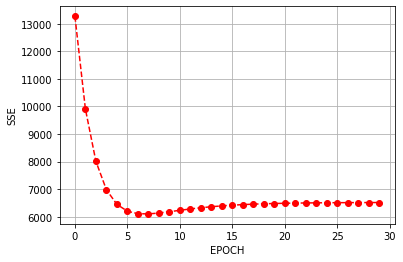

In [36]:
plt.plot(sse_row, '--o', color='red')
plt.xlabel('EPOCH')
plt.ylabel('SSE')
plt.grid()
plt.show()

## 21.07.08

In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/faults.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [38]:
df_dataset = df[['X_Minimum','X_Maximum','Steel_Plate_Thickness','LogOfAreas',
                 'Pastry','Z_Scratch','Bumps']]
print("df_dataset.shape : ", df_dataset.shape)
print(df_dataset.info())

df_dataset.shape :  (1941, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Steel_Plate_Thickness  1941 non-null   int64  
 3   LogOfAreas             1941 non-null   float64
 4   Pastry                 1941 non-null   int64  
 5   Z_Scratch              1941 non-null   int64  
 6   Bumps                  1941 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 106.3 KB
None


In [39]:
df_dataset = np.asarray(df_dataset, dtype='float32')

In [40]:
df_dataset_x = df_dataset[0:1, :-3] # 독립변수
df_dataset_y = df_dataset[0:1, -3:] # 종속변수

print("df_dataset_x : {} \ndf_dataset_x.shape : {}".format(df_dataset_x, df_dataset_x.shape))
print("df_dataset_y : {} \ndf_dataset_y.shape : {}".format(df_dataset_y, df_dataset_y.shape))

df_dataset_x : [[42.     50.     80.      2.4265]] 
df_dataset_x.shape : (1, 4)
df_dataset_y : [[1. 0. 0.]] 
df_dataset_y.shape : (1, 3)


In [45]:
RND_MEAN = 0
RND_STD = 1

input_cnt = df_dataset_x.shape[-1]  # 4
output_cnt = df_dataset_y.shape[-1]  # 3

weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print("weight.shape : ",weight.shape)
print("bias.shape : ", bias.shape)

weight.shape :  (4, 3)
bias.shape :  (3,)


In [48]:
print("df_dataset_x :\n", df_dataset_x)
print("weight : \n",weight)
print("bias : \n", bias)

df_dataset_x :
 [[42.     50.     80.      2.4265]]
weight : 
 [[ 0.83731642  0.16141538  0.57008306]
 [-0.09569925  0.33103111 -0.55493776]
 [-0.91600477 -1.00572119  0.97491996]
 [ 0.86464221  0.08165389  0.30320156]]
bias : 
 [ 2.51782068e-04 -1.56347615e+00 -6.93565346e-01]


In [49]:
P_1 = np.matmul(df_dataset_x[0], weight[:,0]) + bias[0]

P_2 = np.matmul(df_dataset_x[0], weight[:,1]) + bias[1]

P_3 = np.matmul(df_dataset_x[0], weight[:,2]) + bias[2]

print(P_1)
print(P_2)
print(P_3)
print("="*30)
P_total = np.matmul(df_dataset_x, weight) + bias
print(P_total)

-40.79974811576535
-58.49203683532976
74.2323504014715
[[-40.79974812 -58.49203684  74.2323504 ]]


## 파라미터 vs 하이퍼 파라미터

- 파라미터 : 가중치, 편향
- 하이퍼 파라미터 : lr, mean, std, ...

### Matmul과 Dot의 차이점은 무엇입니까?
 - matmul () 함수는 존재하는 원소로서 행렬들의 스택 같은 배열 방송 에 각각, 마지막 2 개 개의 인덱스를. numpy. 반면에 dot () 함수는 첫 번째 배열의 마지막 축과 두 번째 배열의 마지막 축에 대한 곱의 합으로 곱셈을 수행합니다.
 - https://www.programmersought.com/article/23542222380/
 

In [50]:
df = pd.read_csv("/content/faults_mini.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   X_Minimum              10 non-null     int64
 1   Y_Minimum              10 non-null     int64
 2   Pixels_Areas           10 non-null     int64
 3   Steel_Plate_Thickness  10 non-null     int64
 4   Pastry                 10 non-null     int64
 5   Z_Scratch              10 non-null     int64
 6   K_Scatch               10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


In [51]:
input_cnt, output_cnt = 4, 3
data = np.asarray(df, dtype='float32')
print('data : \n',data)
print('type(data) : \n', type(data))

data : 
 [[4.200000e+01 2.709000e+05 2.670000e+02 8.000000e+01 1.000000e+00
  0.000000e+00 0.000000e+00]
 [1.084000e+03 1.855750e+05 1.080000e+02 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [1.109000e+03 1.170194e+06 1.300000e+02 1.750000e+02 0.000000e+00
  1.000000e+00 0.000000e+00]
 [1.900000e+02 2.109360e+05 1.320000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [3.300000e+02 4.292270e+05 2.640000e+02 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [7.400000e+01 7.791440e+05 1.506000e+03 1.500000e+02 1.000000e+00
  0.000000e+00 0.000000e+00]
 [5.100000e+01 5.858610e+05 1.390000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [3.970000e+02 6.044780e+05 4.440000e+02 7.000000e+01 0.000000e+00
  1.000000e+00 0.000000e+00]
 [4.300000e+01 3.668810e+05 4.048000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]
 [4.800000e+01 3.775370e+05 3.985000e+03 4.000000e+01 0.000000e+00
  0.000000e+00 1.000000e+00]]
type(data) : 
 <class 'numpy.n

In [53]:
weight = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])
bias = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])

print("weight.shape : ",weight.shape)
print("bias.shape : ", bias.shape)
print("data.shape : ", data.shape)

weight.shape :  (4, 3)
bias.shape :  (3,)
data.shape :  (10, 7)


In [55]:
mb_size = 2
train_ratio = 0.8

MiniBatch_step_count = int(data.shape[0] * train_ratio) // mb_size
print("MiniBatch_step_count :", MiniBatch_step_count)

MiniBatch_step_count : 4


In [56]:
test_begin_index = MiniBatch_step_count * mb_size
print("test_begin_index : ", test_begin_index)

test_begin_index :  8


In [57]:
# Before suffle
suffle_map = np.arange(data.shape[0])
print(suffle_map)

[0 1 2 3 4 5 6 7 8 9]


In [63]:
# After suffle
np.random.shuffle(suffle_map)
print(suffle_map)

[9 8 6 3 7 5 0 1 4 2]


In [65]:
mb_data_1 = data[suffle_map[0:2]]
mb_data_2 = data[suffle_map[2:4]]
mb_data_3 = data[suffle_map[4:6]]
mb_data_4 = data[suffle_map[6:8]]

print("mb_data_1 \n", mb_data_1)
print("mb_data_2 \n", mb_data_2)
print("mb_data_3 \n", mb_data_3)
print("mb_data_4 \n", mb_data_4)

mb_data_1 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]
 [4.30000e+01 3.66881e+05 4.04800e+03 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]]
mb_data_2 
 [[5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_3 
 [[3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01 0.00000e+00 1.00000e+00
  0.00000e+00]
 [7.40000e+01 7.79144e+05 1.50600e+03 1.50000e+02 1.00000e+00 0.00000e+00
  0.00000e+00]]
mb_data_4 
 [[4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01 1.00000e+00 0.00000e+00
  0.00000e+00]
 [1.08400e+03 1.85575e+05 1.08000e+02 4.00000e+01 0.00000e+00 0.00000e+00
  1.00000e+00]]


## Mini Batch 처리

In [67]:
print("첫 번째 미니배치 데이터의 행과 열")
mb_1_train_x = mb_data_1[:, : -output_cnt]
mb_1_train_y = mb_data_1[:, -output_cnt:]

print("mb_1_train_x : \n", mb_1_train_x)
print("mb_1_train_y : \n", mb_1_train_y)

print("두 번째 미니배치 데이터의 행과 열")
mb_2_train_x = mb_data_2[:, : -output_cnt]
mb_2_train_y = mb_data_2[:, -output_cnt:]

print("mb_2_train_x : \n", mb_2_train_x)
print("mb_2_train_y : \n", mb_2_train_y)

print("세 번째 미니배치 데이터의 행과 열")
mb_3_train_x = mb_data_3[:, : -output_cnt]
mb_3_train_y = mb_data_3[:, -output_cnt:]

print("mb_3_train_x : \n", mb_3_train_x)
print("mb_3_train_y : \n", mb_3_train_y)

print("네 번째 미니배치 데이터의 행과 열")
mb_4_train_x = mb_data_4[:, : -output_cnt]
mb_4_train_y = mb_data_4[:, -output_cnt:]

print("mb_4_train_x : \n", mb_4_train_x)
print("mb_4_train_y : \n", mb_4_train_y)

첫 번째 미니배치 데이터의 행과 열
mb_1_train_x : 
 [[4.80000e+01 3.77537e+05 3.98500e+03 4.00000e+01]
 [4.30000e+01 3.66881e+05 4.04800e+03 4.00000e+01]]
mb_1_train_y : 
 [[0. 0. 1.]
 [0. 0. 1.]]
두 번째 미니배치 데이터의 행과 열
mb_2_train_x : 
 [[5.10000e+01 5.85861e+05 1.39000e+02 7.00000e+01]
 [1.90000e+02 2.10936e+05 1.32000e+02 1.50000e+02]]
mb_2_train_y : 
 [[0. 1. 0.]
 [1. 0. 0.]]
세 번째 미니배치 데이터의 행과 열
mb_3_train_x : 
 [[3.97000e+02 6.04478e+05 4.44000e+02 7.00000e+01]
 [7.40000e+01 7.79144e+05 1.50600e+03 1.50000e+02]]
mb_3_train_y : 
 [[0. 1. 0.]
 [1. 0. 0.]]
네 번째 미니배치 데이터의 행과 열
mb_4_train_x : 
 [[4.20000e+01 2.70900e+05 2.67000e+02 8.00000e+01]
 [1.08400e+03 1.85575e+05 1.08000e+02 4.00000e+01]]
mb_4_train_y : 
 [[1. 0. 0.]
 [0. 0. 1.]]


In [68]:
print("======= 첫 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======")

mb_1_y_hat_1 = np.matmul(mb_1_train_x, weight[:,0]) + bias[0]

mb_1_y_hat_2 = np.matmul(mb_1_train_x, weight[:,1]) + bias[1]

mb_1_y_hat_3 = np.matmul(mb_1_train_x, weight[:,2]) + bias[2]


print("mb_1_y_hat_1 : ", mb_1_y_hat_1)
print("mb_1_y_hat_2 : ", mb_1_y_hat_2)
print("mb_1_y_hat_3 : ", mb_1_y_hat_3)

======= 첫 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======
mb_1_y_hat_1 :  [357537.25467742 347637.3203815 ]
mb_1_y_hat_2 :  [566484.08112991 550356.88018902]
mb_1_y_hat_3 :  [-145449.4665832  -141325.91071863]


In [69]:
print("======= 두 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======")

mb_2_y_hat_1 = np.matmul(mb_2_train_x, weight[:,0]) + bias[0]

mb_2_y_hat_2 = np.matmul(mb_2_train_x, weight[:,1]) + bias[1]

mb_2_y_hat_3 = np.matmul(mb_2_train_x, weight[:,2]) + bias[2]


print("mb_2_y_hat_1 : ", mb_2_y_hat_1)
print("mb_2_y_hat_2 : ", mb_2_y_hat_2)
print("mb_2_y_hat_3 : ", mb_2_y_hat_3)

======= 두 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======
mb_2_y_hat_1 :  [548203.46111783 197329.48854259]
mb_2_y_hat_2 :  [883934.99318145 318173.10014604]
mb_2_y_hat_3 :  [-226066.65184362  -81571.78325878]


In [70]:
print("======= 세 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======")

mb_3_y_hat_1 = np.matmul(mb_3_train_x, weight[:,0]) + bias[0]

mb_3_y_hat_2 = np.matmul(mb_3_train_x, weight[:,1]) + bias[1]

mb_3_y_hat_3 = np.matmul(mb_3_train_x, weight[:,2]) + bias[2]


print("mb_3_y_hat_1 : ", mb_3_y_hat_1)
print("mb_3_y_hat_2 : ", mb_3_y_hat_2)
print("mb_3_y_hat_3 : ", mb_3_y_hat_3)

======= 세 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======
mb_3_y_hat_1 :  [565907.83596413 730456.5746426 ]
mb_3_y_hat_2 :  [ 911598.5789534  1174527.24531596]
mb_3_y_hat_3 :  [-233777.78735476 -300531.44817083]


In [71]:
print("======= 네 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======")

mb_4_y_hat_1 = np.matmul(mb_4_train_x, weight[:,0]) + bias[0]

mb_4_y_hat_2 = np.matmul(mb_4_train_x, weight[:,1]) + bias[1]

mb_4_y_hat_3 = np.matmul(mb_4_train_x, weight[:,2]) + bias[2]


print("mb_4_y_hat_1 : ", mb_4_y_hat_1)
print("mb_4_y_hat_2 : ", mb_4_y_hat_2)
print("mb_4_y_hat_3 : ", mb_4_y_hat_3)

======= 네 번째 미니배치 신경망 연산 결과(P1, P2, P3) =======
mb_4_y_hat_1 :  [253662.906073  173554.0033663]
mb_4_y_hat_2 :  [408584.16403468 279383.69274043]
mb_4_y_hat_3 :  [-104513.87978864  -73282.3600184 ]


In [73]:
print(mb_1_y_hat_1, mb_1_y_hat_2, mb_1_y_hat_3)
print(mb_2_y_hat_1, mb_2_y_hat_2, mb_2_y_hat_3)
print(mb_3_y_hat_1, mb_3_y_hat_2, mb_3_y_hat_3)
print(mb_4_y_hat_1, mb_4_y_hat_2, mb_4_y_hat_3)

[357537.25467742 347637.3203815 ] [566484.08112991 550356.88018902] [-145449.4665832  -141325.91071863]
[548203.46111783 197329.48854259] [883934.99318145 318173.10014604] [-226066.65184362  -81571.78325878]
[565907.83596413 730456.5746426 ] [ 911598.5789534  1174527.24531596] [-233777.78735476 -300531.44817083]
[253662.906073  173554.0033663] [408584.16403468 279383.69274043] [-104513.87978864  -73282.3600184 ]


In [74]:
mb_data_total = np.vstack((mb_data_1, mb_data_2, mb_data_3, mb_data_4))

In [76]:
mb_data_total_x = mb_data_total[:, :-3]
print("mb_data_total_x.shape\n", mb_data_total_x.shape)

mb_data_total_x.shape
 (8, 4)


In [79]:
mb_total_y_hat = np.matmul(mb_data_total_x, weight) + bias
print(mb_total_y_hat)
print(mb_total_y_hat.shape)

[[ 357537.25467742  566484.08112991 -145449.4665832 ]
 [ 347637.3203815   550356.88018902 -141325.91071863]
 [ 548203.46111783  883934.99318145 -226066.65184362]
 [ 197329.48854259  318173.10014604  -81571.78325878]
 [ 565907.83596413  911598.5789534  -233777.78735476]
 [ 730456.5746426  1174527.24531596 -300531.44817083]
 [ 253662.906073    408584.16403468 -104513.87978864]
 [ 173554.0033663   279383.69274043  -73282.3600184 ]]
(8, 3)


# 딥러닝 쪽지시험 준비
- 미니배치 구하는 방법(몫으로 구함)
- 과정! 